# Creating IMF

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import random
import pandas as pd
import networkx as nx

rows=71
columns=11
list_rows=[]
list=[]
 
for row in range (rows):
    list_rows=[]
    for column in range (columns):
        list_rows.append(random.uniform(0,0.5)) 
    list.append(list_rows)
dataset =pd.DataFrame(list)
dataset.columns =['TMC','LR','FL','RC','AW','PR','RD','H','S','E','ER']
dataset.sample(5)

,TMC,LR,FL,RC,AW,PR,RD,H,S,E,ER
12,0.409535,0.350685,0.239219,0.029680,0.365515,0.137210,0.208543,0.272432,0.048778,0.232980,0.264966
27,0.268431,0.161533,0.041557,0.253506,0.473306,0.227094,0.153461,0.047421,0.352421,0.071238,0.040146
46,0.349220,0.039936,0.179171,0.313652,0.298192,0.251407,0.140079,0.203546,0.346243,0.460864,0.251846
45,0.189265,0.410411,0.290595,0.006715,0.128365,0.102958,0.349161,0.313774,0.487725,0.353054,0.084949
49,0.469102,0.245407,0.426533,0.114405,0.456769,0.286407,0.017019,0.108161,0.196427,0.328802,0.071862


# Converting IMF to FZMF

In [2]:
maximum= dataset.max()
print(maximum)

TMC    0.489417
LR     0.497052
FL     0.494118
RC     0.493833
AW     0.480908
PR     0.481226
RD     0.484787
H      0.495694
S      0.487725
E      0.488240
ER     0.496562
dtype: float64


In [3]:
minimum= dataset.min()
print(minimum)

TMC    0.005344
LR     0.005339
FL     0.000019
RC     0.003231
AW     0.005539
PR     0.019401
RD     0.005188
H      0.006744
S      0.011687
E      0.012530
ER     0.013016
dtype: float64


In [4]:
Difference=maximum.subtract(minimum)
Subtraction= dataset.subtract(minimum, axis=1)
FZMF_matrix=Subtraction.div(Difference,axis=1)
FZMF_matrix.sample(5)

,TMC,LR,FL,RC,AW,PR,RD,H,S,E,ER
4,0.083730,0.781453,0.735690,0.399318,0.872686,0.506659,0.972999,0.628992,0.037972,0.519640,0.136345
30,0.400198,0.615133,0.633031,0.907129,0.427999,0.058259,0.517962,0.566406,0.804034,0.056335,0.576295
64,0.817672,0.454572,0.292561,1.000000,0.374748,0.983756,0.862343,0.412070,0.825443,0.511669,0.429517
63,0.341743,0.791546,0.252647,0.445008,0.373342,0.547675,0.589550,0.843210,0.320618,0.607537,0.090819
29,0.675595,0.935361,0.072931,0.470323,0.370741,0.161560,0.681428,0.734131,0.417357,0.961603,0.791076


# Creating SRMF

          TMC        LR        FL        RC        AW        PR        RD  \
TMC  1.000000  0.053373 -0.093907 -0.026019  0.053238 -0.052015 -0.036592   
LR   0.053373  1.000000 -0.130298 -0.020291  0.074882 -0.036884 -0.084619   
FL  -0.093907 -0.130298  1.000000 -0.076514  0.042568 -0.067682 -0.194303   
RC  -0.026019 -0.020291 -0.076514  1.000000 -0.151205  0.039904 -0.054572   
AW   0.053238  0.074882  0.042568 -0.151205  1.000000  0.076023 -0.031063   
PR  -0.052015 -0.036884 -0.067682  0.039904  0.076023  1.000000  0.008161   
RD  -0.036592 -0.084619 -0.194303 -0.054572 -0.031063  0.008161  1.000000   
H    0.088899  0.052742  0.017133 -0.075118 -0.267095  0.015871  0.006693   
S   -0.013443 -0.122389 -0.133822  0.147809  0.013946 -0.087729  0.199734   
E   -0.125658 -0.187458 -0.077351 -0.047644 -0.110803 -0.116306  0.045221   
ER   0.120879  0.028479 -0.031940 -0.118280  0.060100 -0.119606  0.129611   

            H         S         E        ER  
TMC  0.088899 -0.013443 -0.12

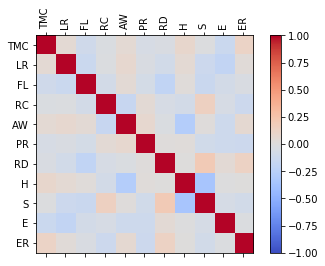

In [5]:
SRMF= FZMF_matrix.corr()
print(SRMF)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(SRMF,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(FZMF_matrix.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(FZMF_matrix.columns)
ax.set_yticklabels(FZMF_matrix.columns)
plt.show()


In [6]:
Boolian_filter_positive_1= SRMF>= 0.2 
Boolian_filter_positive_2= SRMF< 1 
Boolian_filter_positive=Boolian_filter_positive_1 & Boolian_filter_positive_2
Boolian_filter_positive.head()
SRMF[Boolian_filter_positive]

,TMC,LR,FL,RC,AW,PR,RD,H,S,E,ER
TMC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
Boolian_filter_negative=SRMF<= -0.2
Boolian_filter_negative.head()
SRMF[Boolian_filter_negative]

,TMC,LR,FL,RC,AW,PR,RD,H,S,E,ER
TMC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.267095,NaN,NaN,NaN
PR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,-0.267095,NaN,NaN,NaN,-0.342608,NaN,NaN
S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.342608,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


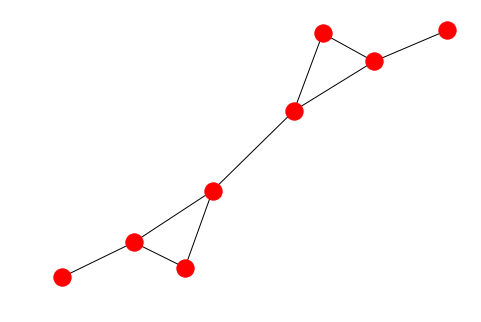

In [8]:
Network=nx.Graph()
Network.add_nodes_from(["TMC","PR","LR","S","RD","FL","AW","ER"])
Network.add_edges_from([("TMC","PR"),("TMC","LR"),("TMC","S"),("LR","RD"),("LR","PR"),("FL","ER"),("FL","ER"),("AW","RD"),("AW","ER"),("RD","ER")])
nx.draw(Network)
plt.savefig("simple_path.png") # save as png
plt.show() # display
